# **MEF Metric Plotter - Individual**
## **High Resolution Sea Ice Diagsnostics Toolset**
 Cameron Carver - University of Cape Town - Jan 2025

This script accesses the locally stored single model MEF file and plots the following for a single model:<br>
    - Annual Mean<br>
    - Seasonal Mean<br>
    - Monthly Mean<br>
    - Time Series<br>
    - Seasonal Distribution<br>
    - Monthly Distribution<br>

### 1. Import Relevant Packages

In [1]:
import os
# os.chdir('') # User can provide root directory information here to simplify directory path definitions elsewhere 
import xarray as xr
import calendar
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
from mpl_toolkits.basemap import Basemap

### 2. Select and Import Model Data
Select desired model MEF file from defined directory. <br>
Extract respective categorised MEF Metrics.<br>
This can also be defined directly in the next step and this step disregarded.

In [2]:
# Import Model Data
# directory = os.listdir('CMIP-MEF/')    #CMIP
directory = os.listdir('HRMIP-MEF/')   #HighResMIP 
for index, item in enumerate(directory, start=0):
    print(f"{index}. {item}", end='\t')
    if index % 2 == 0:
        print() 

0. CMCC-CM2-VHR4-MEF.nc	
1. HRMIP-6-MEF_I1580.nc	2. .DS_Store	
3. HadGEM3-GC31-LL-MEF.nc	4. HRMIP-6-MEF_DEF.nc	
5. HadGEM3-GC31-HM-MEF.nc	6. HRMIP-6-MEF_I015.nc	
7. HRMIP-6-MEF_I80100.nc	8. HadGEM3-GC31-MM-MEF.nc	
9. HRMIP-6-MEF_L15.nc	10. HRMIP-6-MEF_ZERO.nc	
11. CMCC-CM2-HR4-MEF.nc	12. GFDL-CM4C192-MEF.nc	


In [3]:
i=11 #Define Desired Index

# MEF_ds = xr.open_dataset(f'CMIP-MEF/{directory[i]}') #CMIP
MEF_ds = xr.open_dataset(f'HRMIP-MEF/{directory[i]}') #HighResMIP

MEF_a, MEF_s, MEF_m, MEF_b, model = MEF_ds.MEF_a, MEF_ds.MEF_s, MEF_ds.MEF_m, MEF_ds.MEF_b, MEF_ds.model_name.values

print(f'Model Selected: {directory[i]}')

Model Selected: CMCC-CM2-HR4-MEF.nc


### 3. Import Reference Data and Define Plotting Details
Import the reference grid file of the observational data. <br>
Data Access https://nsidc.org/data/g02202/versions/4 <br>
Ancilliary File: https://noaadata.apps.nsidc.org/NOAA/G02202_V4/ancillary/<br>
Provides the reference grid of which model data will be reprojected onto.

In [5]:
# Import reference grid from NSIDC anciliarry file
access_ref_data = 'OBSERVATIONS/SICONC/G02202-cdr-ancillary-sh.nc'
ref_ds = xr.open_dataset(access_ref_data)

# Plotting details
levels=[0, 0.2, 0.5, 0.65, 1.0]
colors = ['peru', 'yellowgreen', 'deepskyblue', 'royalblue']
cmap = mcolors.ListedColormap(colors)
cmap.set_under('darkred')

m = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l')   # Create a Basemap instance with South Polar Stereographic projection
x, y = m(ref_ds.longitude.values, ref_ds.latitude.values)       # Convert latitude and longitude to map projection coordinates

### 4. Plot Annual Mean

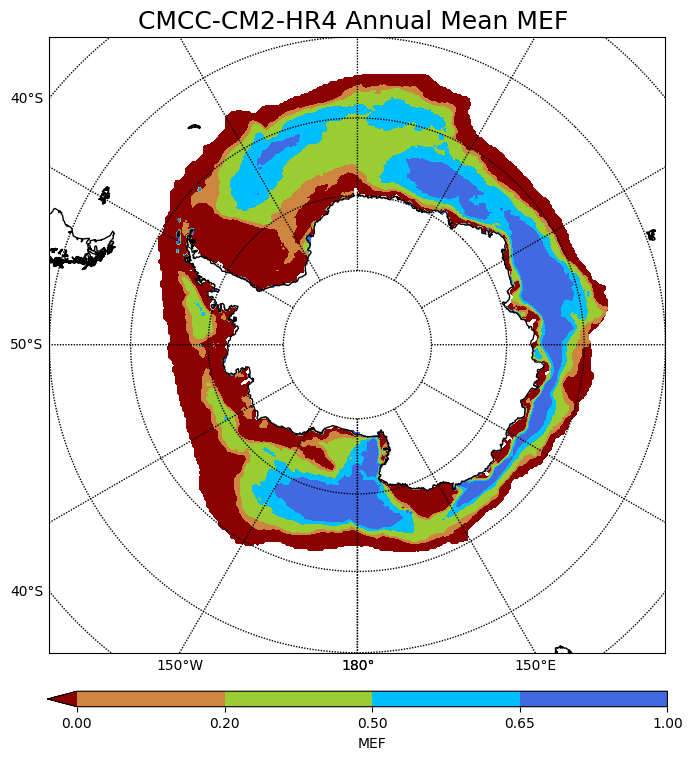

In [6]:
from matplotlib.lines import Line2D
plt.figure(figsize=(8, 10))
m.contourf(x, y, MEF_a.values, cmap=cmap, levels=levels, extend='min')
m.drawcoastlines()
m.drawparallels(np.arange(-90., 0., 10.), labels=[1,0,0,0])
m.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1])
plt.colorbar(label='MEF', orientation='horizontal', pad=0.05,aspect=40)
plt.title(f'{model} Annual Mean MEF ', fontsize=18)

legend_elements = [ Line2D([0], [0], color='k', linestyle='dashed', label='Obs 15%'),
                   Line2D([0], [0], color='blue', label='Model 15%')]

### 5. Plot Seasonal Mean

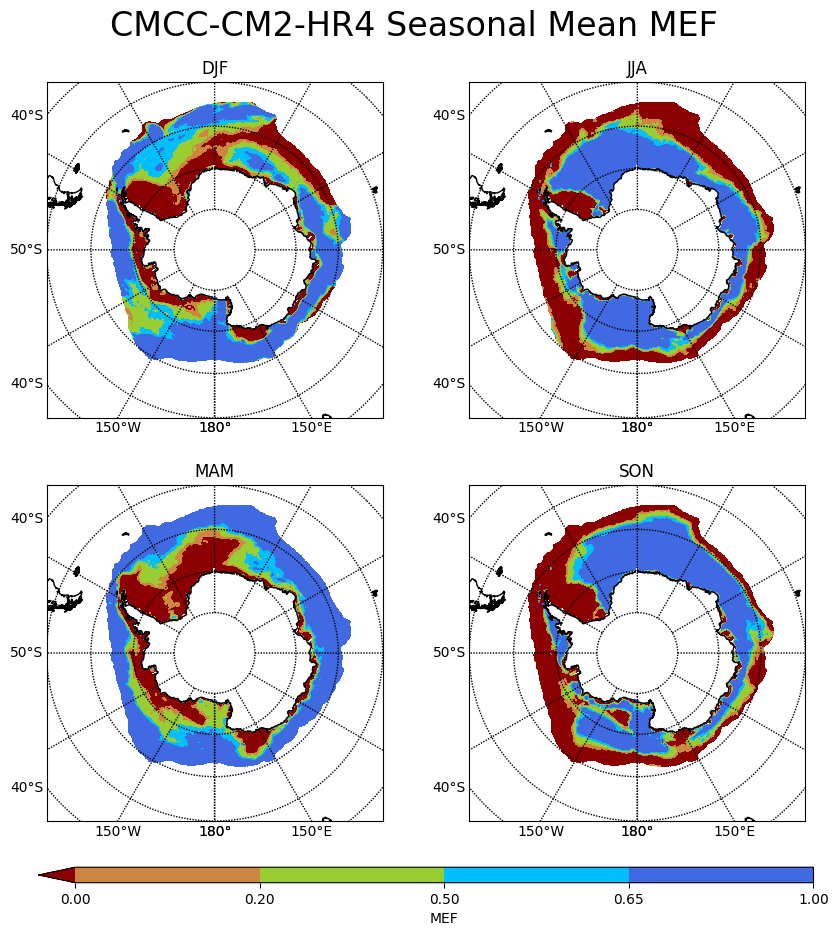

In [7]:
# %%% Plot Seasonal Mean - 2x2
season = MEF_s['season'].values
fig, axes = plt.subplots(2, 2, figsize=(10, 12))

for i in range(4):
    ax = axes[i // 2, i % 2]
    m = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l', ax=ax)
    x, y = m(ref_ds.longitude.values, ref_ds.latitude.values)
    contour = m.contourf(x, y, MEF_s[i,:,:].values, levels=levels, cmap=cmap, extend='min')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 0., 10.), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1])
    ax.set_title(f'{season[i]}')

    fig.suptitle(f'{model} Seasonal Mean MEF', fontsize=24, y=0.94) 
cbar = fig.colorbar(contour, ax=axes.ravel().tolist(), pad=0.05, orientation='horizontal', aspect=50)
cbar.set_label('MEF')

### 6. Plot Monthly Mean

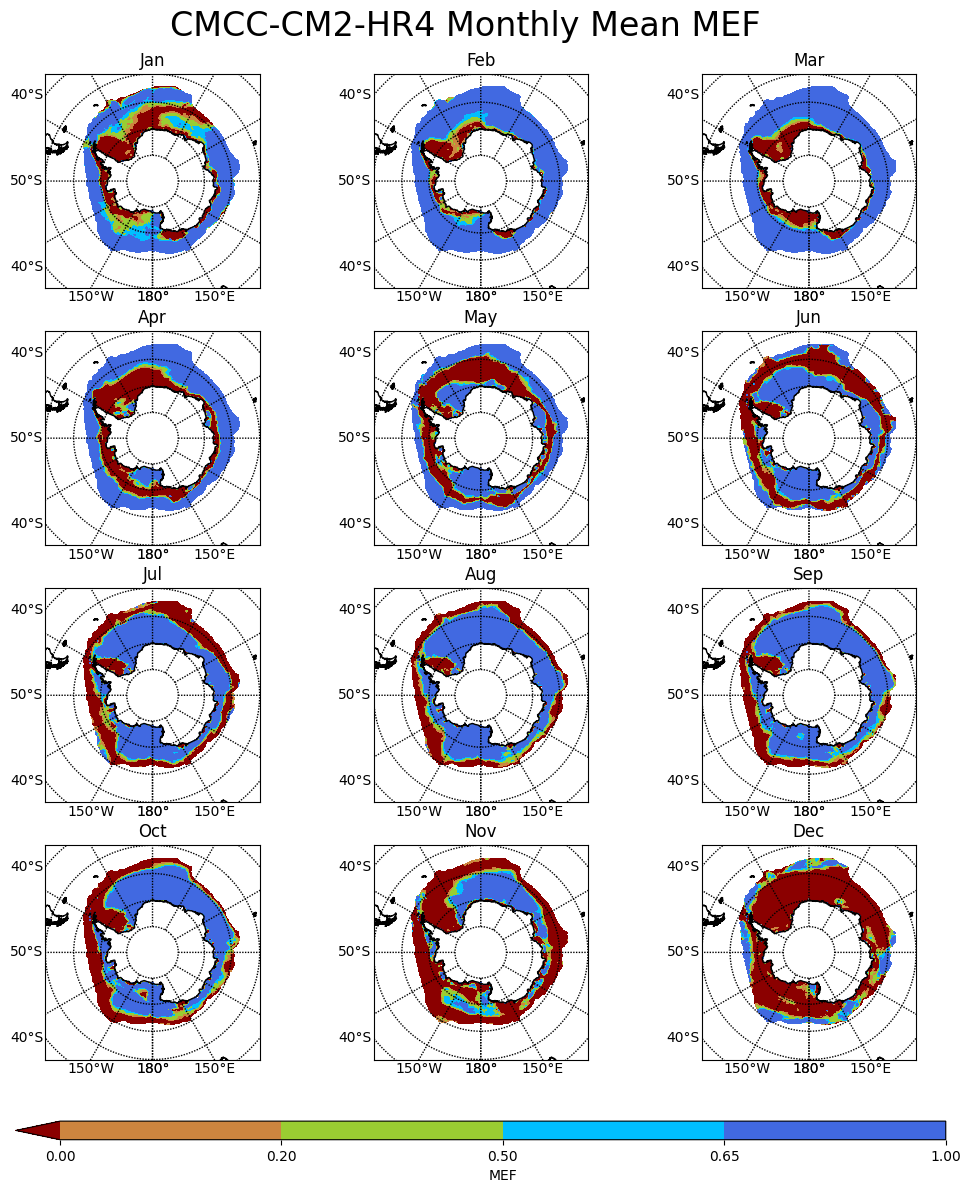

In [8]:
# %%% Plot Monthly Mean - 4x3
months = list(calendar.month_abbr)[1:]
fig, axes = plt.subplots(4, 3, figsize=(12, 16))

for i in range(12):
    ax = axes[i // 3, i % 3]
    m = Basemap(projection='spstere', boundinglat=-50, lon_0=180, resolution='l', ax=ax)
    x, y = m(ref_ds.longitude.values, ref_ds.latitude.values)
    contour = m.contourf(x, y, MEF_m[i,:,:].values, levels=levels, cmap=cmap, extend='min')
    m.drawcoastlines()
    m.drawparallels(np.arange(-90., 0., 10.), labels=[1,0,0,0])
    m.drawmeridians(np.arange(-180., 181., 30.), labels=[0,0,0,1])
    ax.set_title(f'{months[i]}')

fig.suptitle(f'{model} Monthly Mean MEF', fontsize=24, y=0.92) 
cbar = fig.colorbar(contour, ax=axes.ravel().tolist(), pad=0.05, orientation='horizontal', aspect=50)
cbar.set_label('MEF')

### 7. Define Bar Graph Details

In [9]:
from matplotlib.colors import ListedColormap
import pandas as pd
# %% Plot Details
bins = [-np.inf, 0.1, 0.2, 0.5, 0.65, np.inf]
bins2 = [-np.inf, 1, 2, 3, 4, np.inf]
labels = ['Bad', 'Poor', 'Good', 'Very Good', 'Excellent',]
colors = {'Bad': 'firebrick', 'Poor':'sandybrown',
    'Good': 'yellowgreen', 'Very Good': 'skyblue', 'Excellent': 'royalblue'}
cmap = ListedColormap(colors)

### 8. Plot Spatial Mean Time Series

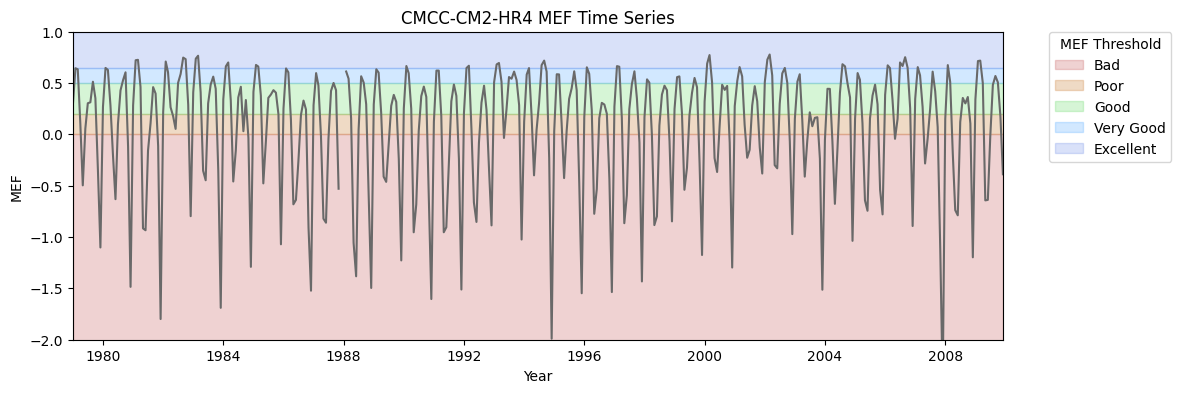

In [10]:
plt.figure(figsize=(12, 4))
MEF_b.plot(color='dimgray')
plt.ylim(bottom=-2, top = 1); plt.xlim(MEF_b.time.min(), MEF_b.time.max())

plt.fill_between(MEF_b.time, -10, 0, color='firebrick', alpha=0.2, label='Bad')
plt.fill_between(MEF_b.time, 0, 0.2, color='peru', alpha=0.3, label='Poor')
plt.fill_between(MEF_b.time, 0.2, 0.5, color='limegreen', alpha=0.2, label='Good')
plt.fill_between(MEF_b.time, 0.5, 0.65, color='dodgerblue', alpha=0.2, label='Very Good')
plt.fill_between(MEF_b.time, 0.65, 1, color='royalblue', alpha=0.2, label='Excellent')

plt.xlabel('Year'); plt.ylabel('MEF'); plt.title(f'{model} MEF Time Series')
plt.legend(title='MEF Threshold', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)

### 9. Plot Binned Seasonal Distribution

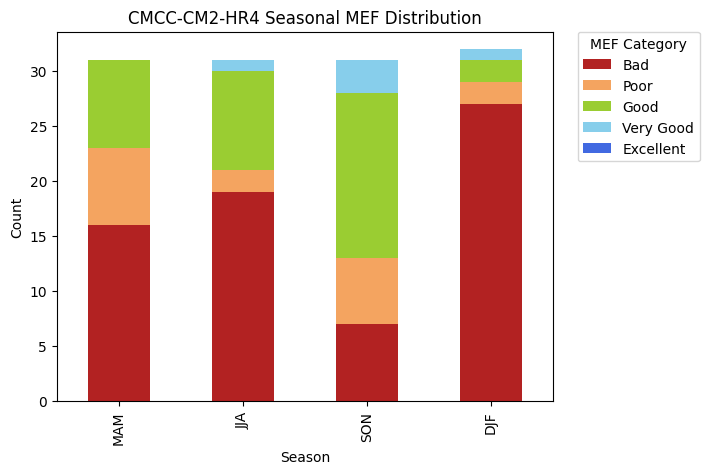

In [11]:
seasonal_data = MEF_b.resample(tdim='QS-DEC').mean()

def bin_data(array, bins):
    return np.digitize(array, bins)

binned_data = xr.apply_ufunc(
    bin_data, seasonal_data, 
    input_core_dims=[[]], kwargs={'bins': bins})

df = binned_data.to_dataframe(name='value').reset_index()

# Count occurrences in each bin
df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
bin_counts1 = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
bin_counts1.index = ['MAM', 'JJA', 'SON', 'DJF']

ax = bin_counts1.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts1.columns])

plt.xlabel('Season'); plt.ylabel('Count'); plt.title(f'{model} Seasonal MEF Distribution')
plt.legend(title='MEF Category', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)

### 10. Plot Binned Monthly Distribution

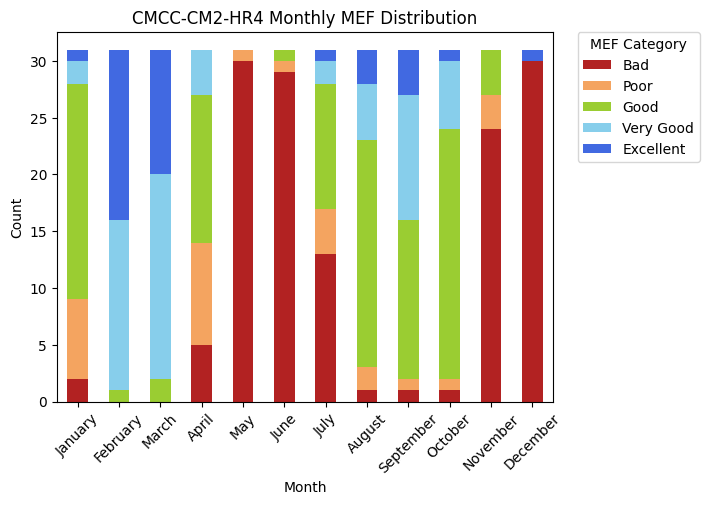

In [12]:
monthly_data = MEF_b.resample(tdim='MS').mean()

def bin_data(array, bins):
    return np.digitize(array, bins)

binned_data = xr.apply_ufunc(
    bin_data, monthly_data, 
    input_core_dims=[[]], kwargs={'bins': bins})

df = binned_data.to_dataframe(name='value').reset_index()

# Count occurrences in each bin
df['bin'] = pd.cut(df['value'], bins=bins2, labels=labels)
bin_counts = df.groupby([df['tdim'].dt.month, 'bin'], observed=False).size().unstack(fill_value=0)
bin_counts.index = pd.to_datetime(bin_counts.index, format='%m').month_name()

ax = bin_counts.plot(kind='bar', stacked=True, color=[colors[label] for label in bin_counts.columns])

ax.set_xticklabels(bin_counts.index, rotation=45)

plt.xlabel('Month'); plt.ylabel('Count'); plt.title(f'{model} Monthly MEF Distribution')
plt.legend(title='MEF Category', bbox_to_anchor=(1.05, 1), loc='best', borderaxespad=0)

### 11. MEF Compressed Values

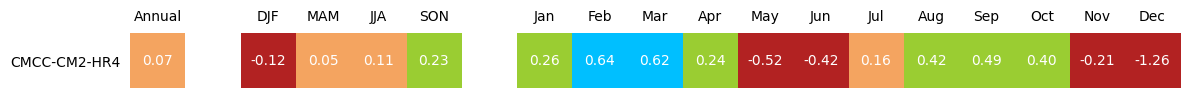

In [13]:
MEFA = MEF_b.mean(dim='tdim').values
MEFS = MEF_b.groupby('time.season').mean(dim='tdim').values
MEFM = MEF_b.groupby('time.month').mean(dim='tdim').values

MEF_heat = np.concatenate([[MEFA], [np.nan], MEFS, [np.nan], MEFM])
values = MEF_heat.reshape(1,-1)

levels=[-100,0.005, 0.2, 0.5, 0.65, 1.0]
colors = ['firebrick','sandybrown', 'yellowgreen', 'deepskyblue', 'royalblue']
cmap = mcolors.ListedColormap(colors)
norm = mcolors.BoundaryNorm(levels, cmap.N, clip=True)

fig, ax = plt.subplots(figsize=(12, 6))
cax = ax.matshow(values, cmap=cmap, norm=norm)

ax.set_yticks([0]); 
ax.set_yticklabels([f'{model}'])
custom_labels = ['Annual','','DJF','MAM','JJA','SON','',
                 'Jan','Feb','Mar','Apr','May','Jun','Jul','Aug','Sep','Oct','Nov','Dec']
ax.set_xticks(np.arange(values.shape[1]))
ax.set_xticklabels(custom_labels, rotation=0)
ax.tick_params(axis='x', which='both', bottom=False, top=False)
ax.tick_params(axis='y', left=False)
for (i, j), val in np.ndenumerate(values):
    ax.text(j, i, f'{val:.2f}', ha='center', va='center', color='white')
for spine in ax.spines.values():
    spine.set_visible(False)
plt.tight_layout()